### MARQ Module 

In [135]:
import numpy as np
import matplotlib.pyplot as plt
x_train = np.array([1.0,2.0])  # x_train is input variable
y_train = np.array([300.0,500.0])  # y_train is the target
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")
print(f"x_train.shape = {x_train.shape}")
print(f"Number of training example = {x_train.shape[0]}")
print(f"Number of training example = {len(x_train)}")

x_train = [1. 2.]
y_train = [300. 500.]
x_train.shape = (2,)
Number of training example = 2
Number of training example = 2


### Training example `X_i, Y_i` 

In [129]:
i = 0 
x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}),y^({i})) = ({x_i},{y_i})")

(x^(0),y^(0)) = (1.0,300.0)


### Plotting the data

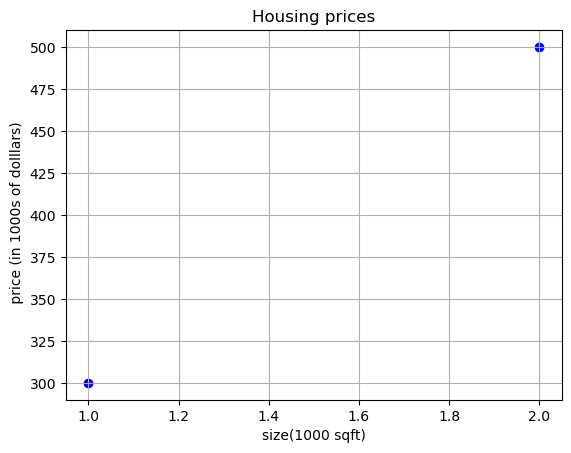

In [55]:
plt.scatter(x_train,y_train,marker = 'o', c  = 'b') # marker is shape like o - circle, s- square and c = 'b' show color like blue
plt.title("Housing prices")
plt.xlabel("size(1000 sqft)")
plt.ylabel(" price (in 1000s of dolllars)")
plt.grid()
plt.show()

### Model function
$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b\tag{1} $$

In [83]:
w = b = 200 # fro different w , b plot of graph changes
def model_Output(x,w,b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

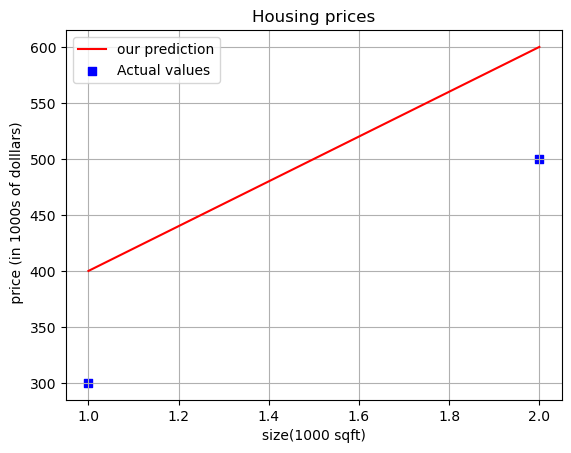

In [85]:
tempf_wb = model_Output(x_train,w,b)
plt.plot(x_train,tempf_wb, c = 'r', label = 'our prediction')
plt.scatter(x_train, y_train, marker = 's', c = 'b', label = 'Actual values')
plt.title("Housing prices")
plt.xlabel("size(1000 sqft)")
plt.ylabel(" price (in 1000s of dolllars)")
plt.legend()
plt.grid()
plt.show()

## Cost Function

In [88]:
x_train = np.array([1.0, 2.0])           #(size in 1000 square feet)
y_train = np.array([300.0, 500.0])           #(price in 1000s of dollars)

### Computing Cost
The equation for the cost in one variable:
$$J(w,b) \frac{1}{2m} \sum\limits_{i=0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$
These difference are summed over all the m  example 

In [138]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w*x[i] + b
        cost = cost + (f_wb - y[i])**2
    ttl_cost = (1/(2*m)) * cost_sum
    return ttl_cost

### Gradient descent was described as:-
$$\begin{align*} \text{repeat}&\text{until convergence:} \; \lbrace \newline\; w &= w - \alpha \frac{\partial J(w,b)}{\partial w} \newline b &= b - \alpha \frac{\partial J(w,b)}{\partial b} \newline \rbrace \end{align*}$$

where parameters $w$ , $b$ are updated simultaneously
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w} &= \frac{1}{m} \sum\limits_{i=0}^{m-1}(f_{w,b}(x^{(i)})- y^{(i)})x^{(i)} \\
\frac{\partial J(w,b)}{\partial b} &= \frac{1}{m} \sum\limits_{i=0}^{m-1}(f_{w,b}(x^{(i)})- y^{(i)})
\end{align}
$$

Iteration 0: Cost = 4.4744, w = 0.1000, b = 0.0300
Iteration 100: Cost = 0.8534, w = 0.7952, b = 0.4341
Iteration 200: Cost = 0.8237, w = 0.7493, b = 0.6000
Iteration 300: Cost = 0.8026, w = 0.7105, b = 0.7401
Iteration 400: Cost = 0.7875, w = 0.6777, b = 0.8584
Iteration 500: Cost = 0.7767, w = 0.6501, b = 0.9583
Iteration 600: Cost = 0.7690, w = 0.6267, b = 1.0426
Iteration 700: Cost = 0.7636, w = 0.6070, b = 1.1138
Iteration 800: Cost = 0.7597, w = 0.5903, b = 1.1739
Iteration 900: Cost = 0.7569, w = 0.5763, b = 1.2247


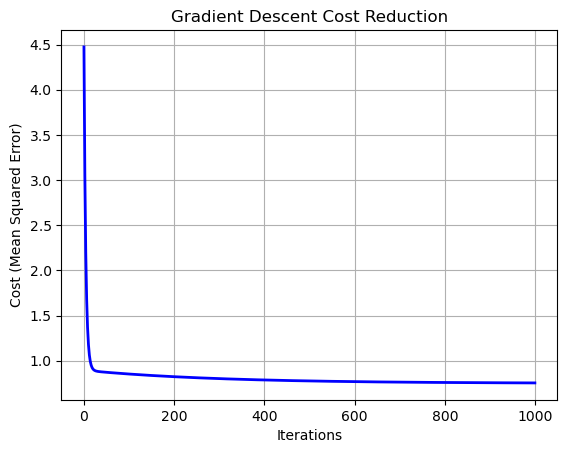


Final values: w = 0.5645, b = 1.2671


In [147]:
import numpy as np
import matplotlib.pyplot as plt

# Compute the gradient function
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

# Gradient Descent Function
def gradient_descent(x, y, w_init, b_init, alpha, num_iters):
    w = w_init
    b = b_init
    cost_history = []  # Store cost values

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)  # Compute gradients
        
        # Update parameters
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Compute and store cost (Mean Squared Error)
        cost = np.mean((w * x + b - y) ** 2) / 2
        cost_history.append(cost)

        # Print progress every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}, w = {w:.4f}, b = {b:.4f}")

    return w, b, cost_history

# Example Data
x_train = np.array([1, 2, 3, 4, 5])  # Feature values
y_train = np.array([2, 4, 1, 3, 5])  # Target values

# Hyperparameters
w_init = 0
b_init = 0
alpha = 0.01  # Learning rate
num_iters = 1000

# Run gradient descent
w_final, b_final, cost_hist = gradient_descent(x_train, y_train, w_init, b_init, alpha, num_iters)

# Plot Cost vs Iterations
plt.plot(range(num_iters), cost_hist, color='blue', linewidth=2)
plt.xlabel("Iterations")
plt.ylabel("Cost (Mean Squared Error)")
plt.title("Gradient Descent Cost Reduction")
plt.grid()
plt.show()

print(f"\nFinal values: w = {w_final:.4f}, b = {b_final:.4f}")
